c:\Users\user\Desktop\coffee_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Desktop\coffee_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📌 Epoch 1: Train Accuracy = 25.10%, Validation Accuracy = 24.75%, Test Accuracy = 24.88%


c:\Users\user\Desktop\coffee_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Desktop\coffee_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📌 Epoch 2: Train Accuracy = 29.17%, Validation Accuracy = 25.44%, Test Accuracy = 35.00%
📌 Epoch 3: Train Accuracy = 41.73%, Validation Accuracy = 43.56%, Test Accuracy = 53.06%
📌 Epoch 4: Train Accuracy = 52.62%, Validation Accuracy = 49.12%, Test Accuracy = 54.31%
📌 Epoch 5: Train Accuracy = 58.63%, Validation Accuracy = 52.69%, Test Accuracy = 56.62%
📌 Epoch 6: Train Accuracy = 61.10%, Validation Accuracy = 50.56%, Test Accuracy = 59.94%
📌 Epoch 7: Train Accuracy = 63.25%, Validation Accuracy = 52.94%, Test Accuracy = 56.75%
📌 Epoch 8: Train Accuracy = 63.92%, Validation Accuracy = 48.75%, Test Accuracy = 57.75%
📌 Epoch 9: Train Accuracy = 65.10%, Validation Accuracy = 54.44%, Test Accuracy = 61.88%
📌 Epoch 10: Train Accuracy = 65.88%, Validation Accuracy = 55.56%, Test Accuracy = 61.94%
📌 Epoch 11: Train Accuracy = 67.23%, Validation Accuracy = 51.31%, Test Accuracy = 58.44%
📌 Epoch 12: Train Accuracy = 68.10%, Validation Accuracy = 56.50%, Test Accuracy = 60.81%
📌 Epoch 13: Train 

<Figure size 1200x600 with 0 Axes>

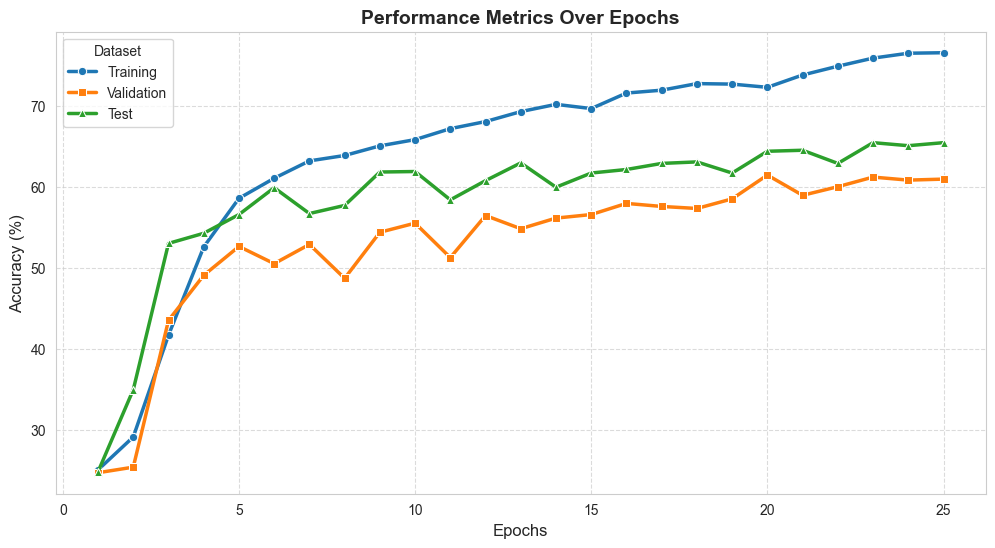

C:\Users\user\AppData\Local\Temp\ipykernel_12772\4260032210.py:214: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Metrics", fontsize=10)


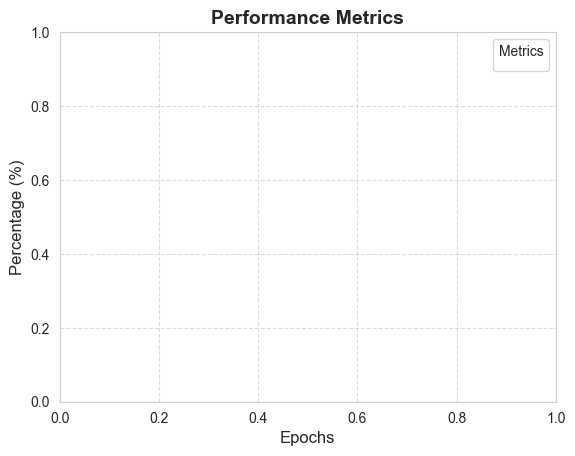

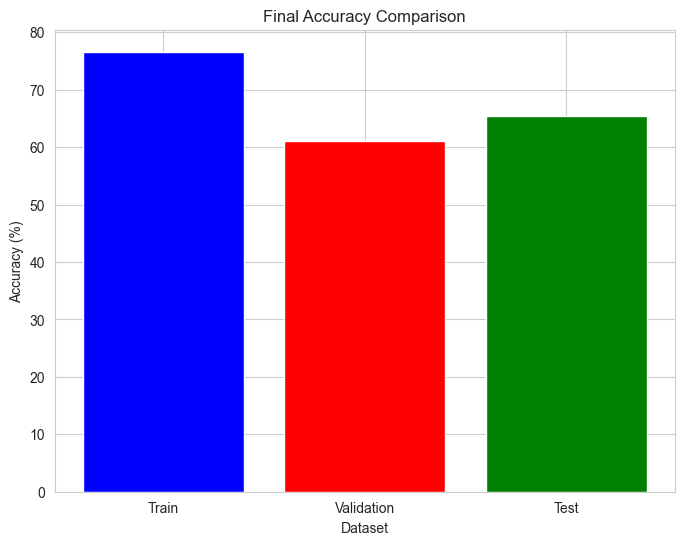


📊 Final Metrics Table:
+------------+-------------------+--------------------+-------------------+-------------------+---------------+
|  Dataset   |      Accuracy     |     Precision      |       Recall      |      F1-Score     | Learning Rate |
+------------+-------------------+--------------------+-------------------+-------------------+---------------+
|   Train    | 76.60416666666666 | 76.48848641601772  | 76.60416666666666 | 76.33199567669917 |     0.001     |
| Validation |        61.0       | 60.698514465178874 |        61.0       | 60.53634897089778 |     0.001     |
|    Test    |        65.5       | 66.26693146487568  |        65.5       | 64.94225111563765 |     0.001     |
+------------+-------------------+--------------------+-------------------+-------------------+---------------+


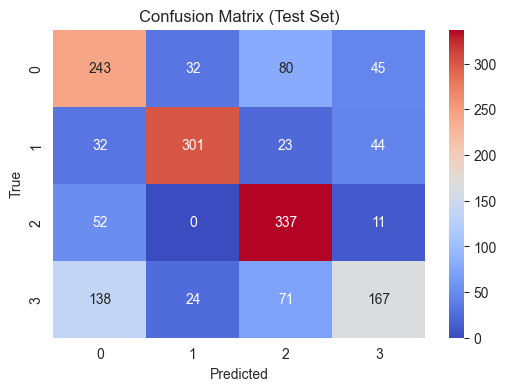

65.5

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.utils.prune as prune
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from prettytable import PrettyTable
from termcolor import colored

# Define the Teacher Model (Lightweight Semantic CNN)
class TeacherCNN(nn.Module):
    def __init__(self):
        super(TeacherCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 4)  # 4 classes
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Define the Student Model (Smaller Sparse CNN)
class StudentCNN(nn.Module):
    def __init__(self):
        super(StudentCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 4)  # 4 classes
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Define Dataset & DataLoader
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root="C:\\Users\\user\\Desktop\\CSC YEAR 2\\SEM 2\\MACHINE LEARNING\\dataset3\\USK-Coffee\\train", transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

dataset_test = datasets.ImageFolder(root="C:\\Users\\user\\Desktop\\CSC YEAR 2\\SEM 2\\MACHINE LEARNING\\dataset3\\USK-Coffee\\test", transform=transform)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

dataset_val = datasets.ImageFolder(root="C:\\Users\\user\\Desktop\\CSC YEAR 2\\SEM 2\\MACHINE LEARNING\\dataset3\\USK-Coffee\\val", transform=transform)
val_loader = DataLoader(dataset_val, batch_size=32, shuffle=False)

# Initialize Models
device = torch.device("cpu")
teacher_model = TeacherCNN().to(device)
student_model = StudentCNN().to(device)

# Define Loss, Optimizer, and KD Loss
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(student_model.parameters(), lr=0.001)

def kd_loss(student_outputs, teacher_outputs, labels, alpha=0.5, temperature=3.0):
    soft_targets = F.softmax(teacher_outputs / temperature, dim=1)
    soft_loss = F.kl_div(F.log_softmax(student_outputs / temperature, dim=1), soft_targets, reduction='batchmean')
    hard_loss = F.cross_entropy(student_outputs, labels)
    return alpha * soft_loss + (1 - alpha) * hard_loss

# Train Student Model using Knowledge Distillation with Early Stopping
def train_student(student, teacher, train_loader, val_loader, test_loader, criterion, optimizer, patience=5):
    teacher.eval()
    student.train()
    best_accuracy = 0
    epochs_no_improve = 0
    train_metrics, val_metrics, test_metrics = [], [], []
    
    while epochs_no_improve < patience:
        running_loss = 0.0
        correct_train, total_train = 0, 0
        all_preds_train, all_labels_train = [], []
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            
            with torch.no_grad():
                teacher_outputs = teacher(images)
            
            student_outputs = student(images)
            loss = kd_loss(student_outputs, teacher_outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted_train = torch.max(student_outputs, 1)
            correct_train += (predicted_train == labels).sum().item()
            total_train += labels.size(0)
            all_preds_train.extend(predicted_train.cpu().numpy())
            all_labels_train.extend(labels.cpu().numpy())
        
        accuracy_train = accuracy_score(all_labels_train, all_preds_train) * 100
        precision_train = precision_score(all_labels_train, all_preds_train, average='weighted') * 100
        recall_train = recall_score(all_labels_train, all_preds_train, average='weighted') * 100
        f1_train = f1_score(all_labels_train, all_preds_train, average='weighted') * 100
        
        train_metrics.append([accuracy_train, precision_train, recall_train, f1_train])
        
        # Evaluate on validation set
        student.eval()
        correct_val, total_val = 0, 0
        all_preds_val, all_labels_val = [], []
        with torch.no_grad():
            for images_val, labels_val in val_loader:
                images_val, labels_val = images_val.to(device), labels_val.to(device)
                outputs_val = student(images_val)
                _, predicted_val = torch.max(outputs_val, 1)
                correct_val += (predicted_val == labels_val).sum().item()
                total_val += labels_val.size(0)
                all_preds_val.extend(predicted_val.cpu().numpy())
                all_labels_val.extend(labels_val.cpu().numpy())
        
        accuracy_val = accuracy_score(all_labels_val, all_preds_val) * 100
        precision_val = precision_score(all_labels_val, all_preds_val, average='weighted') * 100
        recall_val = recall_score(all_labels_val, all_preds_val, average='weighted') * 100
        f1_val = f1_score(all_labels_val, all_preds_val, average='weighted') * 100
        
        val_metrics.append([accuracy_val, precision_val, recall_val, f1_val])
        
        # Evaluate on test set
        correct_test, total_test = 0, 0
        all_preds_test, all_labels_test = [], []
        with torch.no_grad():
            for images_test, labels_test in test_loader:
                images_test, labels_test = images_test.to(device), labels_test.to(device)
                outputs_test = student(images_test)
                _, predicted_test = torch.max(outputs_test, 1)
                correct_test += (predicted_test == labels_test).sum().item()
                total_test += labels_test.size(0)
                all_preds_test.extend(predicted_test.cpu().numpy())
                all_labels_test.extend(labels_test.cpu().numpy())
        
        accuracy_test = accuracy_score(all_labels_test, all_preds_test) * 100
        precision_test = precision_score(all_labels_test, all_preds_test, average='weighted') * 100
        recall_test = recall_score(all_labels_test, all_preds_test, average='weighted') * 100
        f1_test = f1_score(all_labels_test, all_preds_test, average='weighted') * 100
        
        test_metrics.append([accuracy_test, precision_test, recall_test, f1_test])
        
        print(colored(f"📌 Epoch {len(train_metrics)}: Train Accuracy = {accuracy_train:.2f}%, Validation Accuracy = {accuracy_val:.2f}%, Test Accuracy = {accuracy_test:.2f}%", "green"))
        
        if accuracy_val > best_accuracy:
            best_accuracy = accuracy_val
            epochs_no_improve = 0
            torch.save(student.state_dict(), "student_model.pth")
        else:
            epochs_no_improve += 1
    
    print(colored("✅ Training Complete!", "blue"))
    return train_metrics, val_metrics, test_metrics

train_metrics, val_metrics, test_metrics = train_student(student_model, teacher_model, train_loader, val_loader, test_loader, criterion, optimizer)

# Convert results to DataFrame
train_df = pd.DataFrame(train_metrics, columns=["Accuracy", "Precision", "Recall", "F1-Score"])
val_df = pd.DataFrame(val_metrics, columns=["Accuracy", "Precision", "Recall", "F1-Score"])
test_df = pd.DataFrame(test_metrics, columns=["Accuracy", "Precision", "Recall", "F1-Score"])

# Plot training, validation, and test metrics
plt.figure(figsize=(12, 6))
epochs = range(1, len(train_df) + 1)  # Create an epoch index

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Modern styling

sns.lineplot(x=epochs, y=train_df["Accuracy"], marker="o", linewidth=2.5, label="Training")
sns.lineplot(x=epochs, y=val_df["Accuracy"], marker="s", linewidth=2.5, label="Validation")
sns.lineplot(x=epochs, y=test_df["Accuracy"], marker="^", linewidth=2.5, label="Test")

plt.title("Performance Metrics Over Epochs", fontsize=14, fontweight="bold")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Dataset", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


plt.title("Performance Metrics", fontsize=14, fontweight="bold")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Metrics", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Show the graph
plt.show()

# Bar chart for final results
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Validation', 'Test'], [train_df['Accuracy'].iloc[-1], val_df['Accuracy'].iloc[-1], test_df['Accuracy'].iloc[-1]], color=['blue', 'red', 'green'])
plt.title('Final Accuracy Comparison')
plt.xlabel('Dataset')
plt.ylabel('Accuracy (%)')
plt.show()

# Tabulate final metrics
table = PrettyTable(["Dataset", "Accuracy", "Precision", "Recall", "F1-Score", "Learning Rate"])
table.add_row(["Train", train_df['Accuracy'].iloc[-1], train_df['Precision'].iloc[-1], train_df['Recall'].iloc[-1], train_df['F1-Score'].iloc[-1], "0.001"])
table.add_row(["Validation", val_df['Accuracy'].iloc[-1], val_df['Precision'].iloc[-1], val_df['Recall'].iloc[-1], val_df['F1-Score'].iloc[-1], "0.001"])
table.add_row(["Test", test_df['Accuracy'].iloc[-1], test_df['Precision'].iloc[-1], test_df['Recall'].iloc[-1], test_df['F1-Score'].iloc[-1], "0.001"])
print(colored("\n📊 Final Metrics Table:", "cyan"))
print(table)

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

# Evaluate the Student Model
def evaluate_student(model, test_loader):
    model.eval()
    correct, total = 0, 0
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    plot_confusion_matrix(all_labels, all_preds, "Confusion Matrix (Test Set)")
    
    return accuracy_score(all_labels, all_preds) * 100

evaluate_student(student_model, test_loader)
